<a href="https://colab.research.google.com/github/yamadrid/Python/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Este notebook hecho exclusivamente para educación, es una adaptación de  [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) por Jake VanderPlas; contenido original disponible [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

# Introducción a los objetos Pandas

En un nivel muy básico, los objetos Pandas se pueden considerar como versiones mejoradas de matrices estructuradas NumPy en las que las filas y columnas se identifican con etiquetas en lugar de simples índices enteros. Pandas proporciona una serie de herramientas, métodos y funcionalidades útiles además de las estructuras de datos básicas, pero casi todo lo que sigue requerirá una comprensión de qué son estas estructuras. Por lo tanto, antes de seguir adelante, vamos a introducir estas tres estructuras de datos fundamentales pandas: el `Series`, `DataFrame`, y `Index`.

Comenzaremos nuestras sesiones de código con las importaciones estándar de NumPy y Pandas:

In [ ]:
import numpy as np
import pandas as pd

## El objeto de la serie Pandas

Un pandas Series es un arreglo unidimensional de datos indexados. Se puede crear a partir de una lista o arreglo de la siguiente manera:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

Como vemos en la salida, `Series` envuelve tanto una secuencia de valores como una secuencia de índices, a los que podemos acceder con los atributos `values` y `index`. Los `values` son simplemente un arreglo familiarizado NumPy:

In [ ]:
data.values

El `index` es un objeto de tipo similar a una matriz `pd.Index`

In [ ]:
data.index

Al igual que con un arreglo NumPy, se puede acceder a los datos mediante el índice asociado a través de la conocida notación de corchetes de Python:

In [ ]:
data[1]

In [ ]:
data[1:3]

Sin embargo, como veremos, Pandas Serieses mucho más general y flexible que la matriz NumPy unidimensional que emula.

### `Series` como arreglo NumPy generalizado

Por lo que hemos visto hasta ahora, puede parecer que el objeto `Series`  es básicamente intercambiable con un arreglo NumPy unidimensional. La diferencia esencial es la presencia del índice: mientras que Numpy `Array` tiene un índice entero definido implícitamente que se usa para acceder a los valores, Pandas `Series` tiene un índice definido explícitamente asociado con los valores.

Esta definición de índice explícita le da al objeto `Series` capacidades adicionales. Por ejemplo, no es necesario que el índice sea un número entero, pero puede constar de valores de cualquier tipo deseado. Por ejemplo, si lo deseamos, podemos usar cadenas como índice:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

Y el acceso al elemento funciona como se esperaba:

In [ ]:
data['b']

Incluso podemos utilizar índices no contiguos o no secuenciales:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

In [ ]:
data[5]

### `Series` como diccionario especializado

De esta manera, podemos pensar en Pandas `Series` como una especialización de un diccionario de Python. Esta escritura es importante: así como el código compilado específico del tipo detrás de una matriz NumPy lo hace más eficiente que una lista de Python para ciertas operaciones, la información de tipo de un Pandas `Series` lo  hace mucho más eficiente que los diccionarios de Python para ciertas operaciones.

La analogía *Series-diccionario* se puede aclarar aún más construyendo un objeto `Series` directamente desde un diccionario de Python:

In [ ]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

De forma predeterminada, `Series` se creará donde el índice se extrae de las claves ordenadas. Desde aquí, se puede realizar el acceso típico a elementos de estilo diccionario:

In [ ]:
population['California']

Sin embargo, a diferencia de un diccionario, `Series` también admite operaciones de estilo de arreglo, como cortar:

In [ ]:
population['California':'Illinois']

### Construyendo objetos `Serie`

Ya hemos visto algunas formas de construir un Pandas Seriesdesde cero; todos ellos son alguna versión de lo siguiente:

`pd.Series(data, index=index)`

donde `index` es un argumento opcional y `data` puede ser una de muchas entidades.

Por ejemplo, `data` puede ser una lista o un arreglo NumPy, en cuyo caso el valor `index` predeterminado es una secuencia entera:

In [ ]:
pd.Series([2, 4, 6])

`data` puede ser un escalar, que se repite para completar el índice especificado:

In [ ]:
pd.Series(5, index=[100, 200, 300])

`data` puede ser un diccionario

In [ ]:
pd.Series({2:'a', 1:'b', 3:'c'})

En cada caso, el índice se puede establecer explícitamente si se prefiere un resultado diferente:

In [ ]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

Tenga en cuenta que en este caso, el `Series` se completa solo con las claves identificadas explícitamente.

## El objeto Pandas DataFrame

La siguiente estructura fundamental en Pandas es `DataFrame`. Al igual que el objeto `Series` discutido en la sección anterior, `DataFrame` se puede considerar como una generalización de un arreglo NumPy o como una especialización de un diccionario Python. 

### DataFrame como una matriz NumPy generalizada

Si un `Series` es un análogo de una matriz unidimensional con índices flexibles, a `DataFrame` es un análogo de un arreglo bidimensional con índices de fila flexibles y nombres de columna flexibles. Así como podría pensar en un arreglo bidimensional como una secuencia ordenada de columnas unidimensionales alineadas, puede pensar en un `DataFrame` como una secuencia de objetos `Series` alineados . Aquí, por "alineados" queremos decir que comparten el mismo índice.

Para demostrar esto, construyamos primero una nueva lista `Series` del área de cada uno de los cinco estados discutidos en la sección anterior:

In [ ]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

Ahora que tenemos esto junto con la `Serie` `population` anterior, podemos usar un diccionario para construir un único objeto bidimensional que contenga esta información:

In [ ]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

Al igual que el objeto `Series`, `DataFrame` tiene un atributo `index` que da acceso a las etiquetas de índice:

In [ ]:
states.index

Además, `DataFrame` tiene un atributo `columns`, que es un objeto `Index`  que contiene las etiquetas de las columnas:



In [ ]:
states.columns

Por lo tanto, `DataFrame` se puede considerar como una generalización de un arreglo NumPy bidimensional, donde tanto las filas como las columnas tienen un índice generalizado para acceder a los datos.

### DataFrame como diccionario especializado

Del mismo modo, también podemos pensar en a `DataFrame` como una especialización de un diccionario. Cuando un diccionario asigna una clave a un valor, a `DataFrame` asigna un nombre de columna a una `Series` de datos de columna. Por ejemplo, preguntar por el atributo `area` devuelve el objeto `Series` que contiene las áreas que vimos anteriormente:

In [ ]:
states['area']

Observe el punto potencial de confusión aquí: en un arreglo NumPy bidimensional, `data[0]` devolverá la primera fila . Para un `DataFrame`, `data['col0']` devolverá la primera columna . Debido a esto, probablemente sea mejor pensar en los `DataFrames` como diccionarios generalizados en lugar de arreglos generalizadas, aunque ambas formas de ver la situación pueden ser útiles.

### Construyendo objetos DataFrame

Un pandas `DataFrame` se puede construir de varias formas. Aquí daremos varios ejemplos.

#### Desde un único objeto Serie 

Un `DataFrame` es una colección de objetos `Series` y una sola columna `DataFrame` se puede construir a partir de una sola `Series`:

In [ ]:
pd.DataFrame(population, columns=['population'])

#### Desde una lista de diccionarios

Cualquier lista de diccionarios se puede convertir en un archivo `DataFrame`. Usaremos una comprensión de lista simple para crear algunos datos:

In [ ]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

Incluso si faltan algunas claves en el diccionario, Pandas las completará con valores `NaN`:

In [ ]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

#### Desde un diccionario de objetos Serie

Como vimos antes, también `DataFrame` se puede construir a partir de un diccionario de objetos `Series`:

In [ ]:
pd.DataFrame({'population': population,
              'area': area})

#### Desde un arreglo NumPy bidimensional 

Dado un arreglo de datos bidimensional, podemos crear una `DataFrame` con cualquier columna e índice especificado. Si se omite, se utilizará un índice entero para cada uno:

In [ ]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

#### Desde un arreglo estructurado NumPy

Un Pandas `DataFrame` funciona de manera muy similar a un arreglo estructurado y se puede crear directamente a partir de uno:

In [ ]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

In [ ]:
pd.DataFrame(A)

## El objeto Pandas Index

El objeto `Index` es una estructura interesante en sí mismo, y se puede considerar como un arreglo inmutable o como un conjunto ordenado (técnicamente, un conjunto múltiple, ya que los objetos `Index` pueden contener valores repetidos). Esas vistas tienen algunas consecuencias interesantes en las operaciones disponibles en los objetos `Index`. Como ejemplo simple, construyamos un `Index` a partir de una lista de números enteros:

In [ ]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

### Index como arreglo inmutable

`Index` en muchos sentidos, funciona como un arreglo. Por ejemplo, podemos usar la notación de indexación estándar de Python para recuperar valores o porciones:

In [ ]:
ind[1]

In [ ]:
ind[::2]

Los objetos `Index` también tienen muchos de los atributos familiares de los arreglos NumPy:

In [ ]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

Una diferencia entre los objetos `Index` y las matrices NumPy es que los índices son inmutables, es decir, no se pueden modificar a través de los medios normales:

In [ ]:
ind[1] = 0

Esta inmutabilidad hace que sea más seguro compartir `Index` entre múltiples `DataFrames` y arreglos, sin la posibilidad de efectos secundarios de la modificación involuntaria del `Index`.

# Selección e indexación de datos

Comenzaremos con el caso simple del objeto `Series` unidimensional y luego pasaremos al objeto bidimensional más complicado `DataFrame`.

## Selección de datos en serie 

Como vimos en la sección anterior, un objeto `Series` actúa de muchas formas como una matriz NumPy unidimensional, y en muchas formas como un diccionario estándar de Python. Si tenemos en cuenta estas dos analogías superpuestas, nos ayudará a comprender los patrones de indexación y selección de datos en estas matrices.

### Series como diccionario 

Como un diccionario, el objeto `Series` proporciona un mapeo de una colección de claves a una colección de valores:

In [ ]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

In [ ]:
data['b']

También podemos usar expresiones y métodos de Python similares a los de un diccionario para examinar las claves/índices y valores:

In [ ]:
'a' in data

In [ ]:
data.keys()

In [ ]:
list(data.items())

Los objetos `Series` incluso se pueden modificar con una sintaxis similar a la de un diccionario. Así como puede extender un diccionario asignándole una nueva clave, puede extender un `Series` asignando un nuevo valor de índice:

In [ ]:
data['e'] = 1.25
data

Esta fácil mutabilidad de los objetos es una característica conveniente: bajo el capó, Pandas está tomando decisiones sobre el diseño de la memoria y la copia de datos que podrían ser necesarias; el usuario generalmente no necesita preocuparse por estos problemas.

### Series como arreglo unidimensional

Un `Series` se basa en esta interfaz similar a un diccionario y proporciona selección de elementos de estilo de arreglo a través de los mismos mecanismos básicos que las matrices NumPy, es decir, porciones , enmascaramiento e indexación elegante . Ejemplos de estos son los siguientes:

In [ ]:
# slicing by explicit index
data['a':'c']

In [ ]:
# slicing by implicit integer index
data[0:2]

In [ ]:
# masking
data[(data > 0.3) & (data < 0.8)]

In [ ]:
# fancy indexing
data[['a', 'e']]

Entre estos, el corte en rodajas puede ser la fuente de mayor confusión. Observe que cuando se divide con un índice explícito (es decir, `data['a':'c']`), el índice final se incluye en el segmento, mientras que cuando se divide con un índice implícito (es decir, `data[0:2]`), el índice final se excluye del segmento.

### Indexadores: loc, iloc y ix

Estas convenciones de segmentación e indexación pueden ser una fuente de confusión. Por ejemplo, si `Series` tiene un índice entero explícito, una operación de indexación como `data[1]` utilizará los índices explícitos, mientras que una operación de segmentación como `data[1:3]`utilizará el índice implícito de estilo Python.

In [ ]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

In [ ]:
# explicit index when indexing
data[1]

In [ ]:
# implicit index when slicing
data[1:3]

Pandas proporciona algunos especiales indexador atributos que exponga explícitamente ciertos esquemas de indexación. Estos no son métodos funcionales, sino atributos que exponen una interfaz de corte particular a los datos en el `Series`.

Primero, el atributo `loc` permite indexar y segmentar que siempre hace referencia al índice explícito:

In [ ]:
data.loc[1]

In [ ]:
data.loc[1:3]

El atributo `iloc` permite indexar y segmentar que siempre hace referencia al índice implícito de estilo Python:

In [ ]:
data.iloc[1]

In [ ]:
data.iloc[1:3]

Un tercer atributo de indexación, `ix` es un híbrido de los dos, y para los objetos `Series` es equivalente a la indexación `[]` basada en estándares. El propósito del indexador `ix` se hará más evidente en el contexto de los objetos DataFrame.

La naturaleza explícita de `loc` y los `iloc` hace muy útiles para mantener un código limpio y legible; especialmente en el caso de índices enteros.

## Selección de datos en DataFrame

Como sabemos un `DataFrame` actúa de muchas formas como un arreglo bidimensional o estructurada, y de otras formas como un diccionario de `Series` estructuras que comparten el mismo índice. Puede ser útil tener en cuenta estas analogías a medida que exploramos la selección de datos dentro de esta estructura.

### DataFrame como diccionario

La primera analogía que consideraremos es el `DataFrame` como diccionario de objetos `Series` relacionados.

In [ ]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

Se puede acceder a la `Series` individual que forma las columnas del `DataFrame` mediante la indexación al estilo de diccionario:

In [ ]:
data['area']

De manera equivalente, podemos usar el acceso de estilo de atributo con nombres de columna que son cadenas:

In [ ]:
data.area

Este acceso de columna de estilo de atributo en realidad accede exactamente al mismo objeto que el acceso de estilo de diccionario:

In [ ]:
data.area is data['area']

Aunque esta es una abreviatura útil, tenga en cuenta que no funciona en todos los casos. Por ejemplo, si los nombres de las columnas no son cadenas, o si los nombres de las columnas entran en conflicto con los métodos de `DataFrame`, este acceso de estilo de atributo no es posible. Por ejemplo, `DataFrame` tiene un método `pop()`, por lo que `data.pop` apuntará a esto en lugar de a la columna "pop":

In [ ]:
data.pop is data['pop']

Esta sintaxis estilo diccionario también se puede usar para modificar el objeto, en este caso agregando una nueva columna:

In [ ]:
data['density'] = data['pop'] / data['area']
data

Esto muestra una vista previa de la sintaxis sencilla de la aritmética elemento por elemento entre objetos `Series`

### DataFrame como arreglo bidimensional 

Como sabemos `DataFrame` se puede ver como un arreglo bidimensional mejorado. Podemos examinar el arreglo de datos subyacentes sin procesar utilizando el atributo `values`:

In [ ]:
data.values

Con esta imagen en mente, muchas observaciones familiares similares a arreglos se pueden realizar en `DataFrame` por sí mismo. Por ejemplo, podemos transponer el completo `DataFrame` para intercambiar filas y columnas:

In [ ]:
data.T

Sin embargo, cuando se trata de indexar objetos `DataFrame`, está claro que la indexación de columnas al estilo de diccionario excluye nuestra capacidad para tratarlo simplemente como un arreglo NumPy. 

En particular, pasar un único índice a una matriz accede a una fila:

In [ ]:
data.values[0]

y pasar un solo "índice" en un `DataFrame` accede a una columna:

In [ ]:
data['area']

Por lo tanto, para la indexación de estilo de arreglo, necesitamos otra convención. Aquí pandas utiliza de nuevo los indexadores `loc`, `iloc` y `ix`. Usando el indexador `iloc`, podemos indexar el arreglo subyacente como si fuera un arreglo NumPy simple (usando el índice implícito de estilo Python), pero las etiquetas `DataFrame` de índice y columna se mantienen en el resultado:

In [ ]:
data.iloc[:3, :2]

De manera similar, usando el indexador `loc` podemos indexar los datos subyacentes en un estilo similar a un arreglo pero usando el índice explícito y los nombres de columna:

In [ ]:
data.loc[:'Illinois', :'pop']

El indexador `ix` permite un híbrido de estos dos enfoques:

In [ ]:
data.ix[:3, :'pop']

Tenga en cuenta que para los índices enteros, el indexador `ix` está sujeto a las mismas fuentes potenciales de confusión que se discutieron para los objetos `Series` indexados con enteros.

Cualquiera de los patrones familiares de acceso a datos de estilo NumPy se puede utilizar dentro de estos indexadores. Por ejemplo, en el indexador `loc` podemos combinar enmascaramiento e indexación sofisticada como se muestra a continuación:

In [ ]:
data.loc[data.density > 100, ['pop', 'density']]

Cualquiera de estas convenciones de indexación también se puede utilizar para establecer o modificar valores; esto se hace de la manera estándar a la que podría estar acostumbrado al trabajar con NumPy:

In [ ]:
data.iloc[0, 2] = 90
data

### Convenciones de indexación adicionales 

Hay un par de convenciones de indexación adicionales que pueden parecer contrarias a la discusión anterior, pero que, no obstante, pueden resultar muy útiles en la práctica. Primero, mientras que la indexación se refiere a columnas, la segmentación se refiere a filas:

In [ ]:
data['Florida':'Illinois']

Dichos sectores también pueden referirse a filas por número en lugar de por índice:

In [ ]:
data[1:3]

De manera similar, las operaciones de enmascaramiento directo también se interpretan por filas en lugar de por columnas:

In [ ]:
data[data.density > 100]

Estas dos convenciones son sintácticamente similares a las de un arreglo NumPy, y aunque es posible que no se ajusten con precisión al molde de las convenciones de Pandas, son bastante útiles en la práctica.

# Operar con datos en Pandas

Pandas hereda gran parte de esta funcionalidad de NumPy. Sin embargo, Pandas incluye un par de giros útiles: para operaciones unarias como funciones de negación y trigonométricas, estas ufuncs conservarán las etiquetas de índice y columna en la salida, y para operaciones binarias como suma y multiplicación, Pandas alineará automáticamente los índices al pasar los objetos a el ufunc. Esto significa que mantener el contexto de los datos y combinar datos de diferentes fuentes, ambas tareas potencialmente propensas a errores con arreglos NumPy sin procesar, se vuelven esencialmente infalibles con Pandas.

## Ufuncs: Conservación del Index

Debido a que Pandas está diseñado para funcionar con NumPy, cualquier ufunc de NumPy funcionará en objetos Pandas `Series` y `DataFrame`. Empecemos por definir un sencillo `Series` y `DataFrame` sobre el que demostrar esto:

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

In [ ]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

Si aplicamos un ufunc NumPy en cualquiera de estos objetos, el resultado será otro objeto Pandas con los índices preservados:

In [ ]:
np.exp(ser)

O, para un cálculo un poco más complejo:

In [ ]:
np.sin(df * np.pi / 4)

## UFuncs: Alineación de Index

Para operaciones binarias en dos objetos `Series` u `DataFrame`, Pandas alineará índices en el proceso de realizar la operación. Esto es muy conveniente cuando se trabaja con datos incompletos, como veremos en algunos de los ejemplos que siguen.

### Alineación de Index en Serie

Como ejemplo, supongamos que estamos combinando dos fuentes de datos diferentes y encontramos solo los tres estados principales de EE.UU. Por área y los tres estados de EE.UU. Principales por población :

In [ ]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

Veamos qué sucede cuando dividimos estos para calcular la densidad de población:

In [ ]:
population / area

El arreglo resultante contiene la unión de índices de las dos matrices de entrada, que podrían determinarse utilizando la aritmética de conjuntos estándar de Python en estos índices:

In [ ]:
area.index | population.index

Cualquier elemento para el que uno u otro no tenga una entrada se marca con NaN, que es la forma en que Pandas marca los datos faltantes. Esta coincidencia de índices se implementa de esta manera para cualquiera de las expresiones aritméticas integradas de Python; los valores faltantes se rellenan con NaN de forma predeterminada:

In [ ]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

Si usar valores de NaN no es el comportamiento deseado, el valor de relleno se puede modificar usando los métodos de objeto apropiados en lugar de los operadores. Por ejemplo, llamar `A.add(B)` es equivalente a llamar `A + B`, pero permite una especificación explícita opcional del valor de relleno para cualquier elemento en A o B que pueda faltar:

In [ ]:
A.add(B, fill_value=0)

### Alineación de índices en DataFrame

Se produce un tipo similar de alineación tanto para las columnas como para los índices cuando se realizan operaciones en `DataFrames`:

In [ ]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

In [ ]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

In [ ]:
A + B

Observe que los índices están alineados correctamente independientemente de su orden en los dos objetos, y los índices del resultado están ordenados. Como fue el caso con `Series`, podemos usar el método aritmético del objeto asociado y pasar lo que deseemos `fill_value` para usar en lugar de las entradas faltantes. Aquí llenaremos con la media de todos los valores en A(calculados apilando primero las filas de A):

In [ ]:
fill = A.stack().mean()
A.add(B, fill_value=fill)

La siguiente tabla enumera los operadores de Python y sus métodos de objeto Pandas equivalentes:

| Python Operator | Pandas Method(s)                      |
|-----------------|---------------------------------------|
| ``+``           | ``add()``                             |
| ``-``           | ``sub()``, ``subtract()``             |
| ``*``           | ``mul()``, ``multiply()``             |
| ``/``           | ``truediv()``, ``div()``, ``divide()``|
| ``//``          | ``floordiv()``                        |
| ``%``           | ``mod()``                             |
| ``**``          | ``pow()``                             |


## Ufuncs: Operaciones entre DataFrame y Series

Al realizar operaciones entre `Series` y `DataFrame`, la alineación del índice y la columna se mantiene de manera similar. Las operaciones entre Series y DataFrame son similares a las operaciones entre una arreglos NumPy bidimensional y unidimensional. Considere una operación común, donde encontramos la diferencia de una matriz bidimensional y una de sus filas:


In [ ]:
A = rng.randint(10, size=(3, 4))
A

In [ ]:
A - A[0]

De acuerdo con las reglas de transmisión de NumPy, la resta entre una matriz bidimensional y una de sus filas se aplica por filas.

En Pandas, la convención opera de manera similar por filas de forma predeterminada:

In [ ]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

Si, en cambio, desea operar en columnas, puede usar los métodos de objeto mencionados anteriormente, mientras especifica la palabra clave `axis`:

In [ ]:
df.subtract(df['R'], axis=0)

Tenga en cuenta que estas operaciones `DataFrame`/`Series`, como las operaciones discutidas anteriormente, alinearán automáticamente los índices entre los dos elementos:

In [ ]:
halfrow = df.iloc[0, ::2]
halfrow

In [ ]:
df - halfrow

Esta preservación y alineación de índices y columnas significa que las operaciones con datos en Pandas siempre mantendrán el contexto de los datos, lo que evita los tipos de errores tontos que pueden surgir al trabajar con datos heterogéneos y/o desalineados en arreglos NumPy sin procesar.

# Manejo de datos faltantes

La diferencia entre los datos que se encuentran en muchos tutoriales y los datos del mundo real es que los datos del mundo real rara vez son limpios y homogéneos. En particular, a muchos conjuntos de datos interesantes les faltará cierta cantidad de datos. Para complicar aún más las cosas, diferentes fuentes de datos pueden indicar datos faltantes de diferentes maneras.

### ``None``: Datos faltantes de Pythonic

El primer valor centinela utilizado por Pandas es `None` un objeto de Python que a menudo se usa para los datos faltantes en el código de Python. Debido a que es un objeto Python, `None` no se puede usar en ningú arreglo arbitrario de NumPy/Pandas, sino solo en arreglos con tipo de datos 'object'(es decir, arreglos de objetos Python):

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

Esto `dtype=object` significa que la mejor representación de tipo común que NumPy podría inferir para el contenido de la matriz es que son objetos de Python. Si bien este tipo de matriz de objetos es útil para algunos propósitos, cualquier operación en los datos se realizará en el nivel de Python, con mucha más sobrecarga que las operaciones típicamente rápidas que se ven para los arreglos con tipos nativos:

In [ ]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

El uso de objetos Python en un arreglo también significa que si realiza agregaciones como `sum()` o `min()` en un arreglo con un valor `None`, generalmente obtendrá un error:

In [ ]:
vals1.sum()

Esto refleja el hecho de que la suma entre un número entero y `None` no está definida.

### ``NaN``: Faltan datos numéricos

La otra representación de datos faltantes, NaN(acrónimo de Not a Number), es diferente; es un valor de punto flotante especial reconocido por todos los sistemas que utilizan la representación de punto flotante estándar IEEE:

In [ ]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

Tenga en cuenta que NumPy eligió un tipo de punto flotante nativo para este arreglo: esto significa que, a diferencia del arreglo de objetos de antes, este arreglo admite operaciones rápidas introducidas en código compilado. Debe tener en cuenta que `NaN` se parece un poco a un virus de datos: infecta cualquier otro objeto que toque. Independientemente de la operación, el resultado de la aritmética con `NaN` será otro `NaN`:

In [ ]:
1 + np.nan

In [ ]:
0 *  np.nan

Tenga en cuenta que esto significa que los agregados sobre los valores están bien definidos (es decir, no dan como resultado un error) pero no siempre son útiles:

In [ ]:
vals2.sum(), vals2.min(), vals2.max()

NumPy proporciona algunas agregaciones especiales que ignorarán estos valores faltantes:

In [ ]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

Tenga en cuenta que `NaN` es específicamente un valor de punto flotante; no hay un valor `NaN` equivalente para enteros, cadenas u otros tipos.

### NaN y None en Pandas

`NaN` y `None` ambos tienen su lugar, y Pandas está diseñado para manejarlos a los dos de manera casi intercambiable, convirtiéndose entre ellos cuando sea apropiado:

In [ ]:
pd.Series([1, np.nan, 2, None])

Para los tipos que no tienen un valor centinela disponible, Pandas escribe automáticamente cuando los valores NA están presentes. Por ejemplo, si establecemos un valor en un arreglo de enteros en `np.nan`, se convertirá automáticamente en un tipo de punto flotante para acomodar el NA:

In [ ]:
x = pd.Series(range(2), dtype=int)
x

In [ ]:
x[0] = None
x

Tenga en cuenta que, además de convertir lel arreglo de enteros en punto flotante, Pandas convierte automáticamente el `None` en un valor `NaN`.

La siguiente tabla enumera las convenciones de upcasting en Pandas cuando se introducen valores NA:

|Typeclass     | Conversion When Storing NAs | NA Sentinel Value      |
|--------------|-----------------------------|------------------------|
| ``floating`` | No change                   | ``np.nan``             |
| ``object``   | No change                   | ``None`` or ``np.nan`` |
| ``integer``  | Cast to ``float64``         | ``np.nan``             |
| ``boolean``  | Cast to ``object``          | ``None`` or ``np.nan`` |

Tenga en cuenta que en Pandas, los datos de cadena siempre se almacenan con un tipo `object d`.

## Operando con valores nulos 

Como hemos visto, Pandas trata `None` y `NaN` como esencialmente intercambiable para indicar valores faltantes o nulos. Para facilitar esta convención, existen varios métodos útiles para detectar, eliminar y reemplazar valores nulos en las estructuras de datos de Pandas. Son:

*   isnull(): Genera una máscara booleana que indica los valores faltantes
*   notnull(): Opuesto de isnull()
*   dropna(): Devuelve una versión filtrada de los datos
*   fillna(): Devuelve una copia de los datos con los valores faltantes rellenos o imputados

### Detectando valores nulos

Las estructuras de datos de Pandas tienen dos métodos útiles para detectar datos nulos: `isnull()` y `notnull()`. Cualquiera de los dos devolverá una máscara booleana sobre los datos. Por ejemplo:

In [ ]:
data = pd.Series([1, np.nan, 'hello', None])

In [ ]:
data.isnull()

In [ ]:
data[data.notnull()]

Los métodos `isnull()` y `notnull()` producen resultados booleanos similares para `DataFrames`.

### Eliminando valores nulos

Además del enmascaramiento utilizado anteriormente, existen los métodos de conveniencia `dropna()` (que elimina los valores de NA) y `fillna()`(que completa los valores de NA). Para un `Series`, el resultado es sencillo:

In [ ]:
data.dropna()

Para un `DataFrame`, hay más opciones. Considere el siguiente `DataFrame`:

In [ ]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

No podemos eliminar valores individuales de un `DataFrame`; solo podemos eliminar filas o columnas completas. Dependiendo de la aplicación, es posible que desee una u otra, por lo que `dropna()` ofrece una serie de opciones para un DataFrame.

De forma predeterminada, `dropna()` eliminará todas las filas en las que esté presente algún valor nulo:

In [ ]:
df.dropna()

,0,1,2
1,2.0,3.0,5


Alternativamente, puede colocar valores NA a lo largo de un eje diferente;`axis=1` elimina todas las columnas que contienen un valor nulo:

In [ ]:
df.dropna(axis='columns')

Pero esto también arroja algunos buenos datos; quizás le interese eliminar filas o columnas con todos los valores NA, o la mayoría de los valores NA. Esto se puede especificar a través de los parámetros `how` o `thresh`, que permiten un control preciso del número de nulos a permitir.

El valor predeterminado es `how='any'`, de modo que `axis` eliminará cualquier fila o columna (según la palabra clave) que contenga un valor nulo. También puede especificar `how='all'`, que solo eliminará filas/columnas que sean todos valores nulos:

In [ ]:
df[3] = np.nan
df

In [ ]:
df.dropna(axis='columns', how='all')

Para un control más detallado, el threshparámetro le permite especificar un número mínimo de valores no nulos para que la fila/columna se mantenga:

In [ ]:
df.dropna(axis='rows', thresh=3)

Aquí se han eliminado la primera y la última fila, porque contienen solo dos valores no nulos.

### Llenado de valores nulos

A veces, en lugar de eliminar los valores NA, prefiere reemplazarlos con un valor válido. Este valor puede ser un solo número como cero, o puede ser algún tipo de imputación o interpolación de los buenos valores. Puede hacer esto en el lugar usando el método `isnull()` como una máscara, pero debido a que es una operación tan común, Pandas proporciona el método `fillna()`, que devuelve una copia de la matriz con los valores nulos reemplazados.

Considere lo siguiente Series:

In [ ]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

Podemos completar las entradas de NA con un solo valor, como cero:

In [ ]:
data.fillna(0)

Podemos especificar un relleno hacia adelante para propagar el valor anterior hacia adelante:

In [ ]:
# forward-fill
data.fillna(method='ffill')

O podemos especificar un relleno para propagar los siguientes valores hacia atrás:

In [ ]:
# back-fill
data.fillna(method='bfill')

Para `DataFrames`, las opciones son similares, pero también podemos especificar un `axis` a lo largo de la cual se realizan los rellenos:

In [ ]:
df

In [ ]:
df.fillna(method='ffill', axis=1)

Tenga en cuenta que si un valor anterior no está disponible durante un llenado hacia adelante, el valor NA permanece.

# Indexación jerárquica

Hasta este punto, nos hemos centrado principalmente en datos unidimensionales y bidimensionales, almacenados en objetos Pandas `Series` y `DataFrame`, respectivamente. A menudo, es útil ir más allá y almacenar datos de dimensiones superiores, es decir, datos indexados por más de una o dos claves. Mientras pandas proporciona objetos `Panel` y `Panel4D` que de forma nativa manejan datos tridimensionales y de cuatro dimensiones, un patrón mucho más común en la práctica es hacer uso de indexación jerárquico (también conocido como multi-indexación) para incorporar múltiples niveles de índice dentro de un único índice. De esta manera, los datos de mayor dimensión se pueden representar de forma compacta dentro del familiar unidimensionalSeriesy DataFrameobjetos bidimensionales .

Comenzamos con las importaciones estándar:

In [ ]:
import pandas as pd
import numpy as np

## Una serie indexada multiplicada

Comencemos por considerar cómo podríamos representar datos bidimensionales dentro de uno `Series` unidimensional. Para mayor concreción, consideraremos una serie de datos donde cada punto tiene un carácter y una clave numérica.

### El mal camino

Suponga que le gustaría rastrear datos sobre estados de dos años diferentes. Usando las herramientas de Pandas que ya hemos cubierto, es posible que tenga la tentación de usar simplemente tuplas de Python como claves:

In [ ]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

Con este esquema de indexación, puede indexar o dividir directamente la serie en función de este índice múltiple:

In [ ]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

Pero la conveniencia termina ahí. Por ejemplo, si necesita seleccionar todos los valores de 2010, necesitará hacer algunas tareas desordenadas (y potencialmente lentas) para que esto suceda:

In [ ]:
pop[[i for i in pop.index if i[1] == 2010]]

Esto produce el resultado deseado, pero no es tan limpio (o tan eficiente para grandes conjuntos de datos) como la sintaxis de segmentación que nos encanta en Pandas.

### La mejor manera: Pandas MultiIndex 

Afortunadamente, Pandas ofrece una mejor manera. Nuestra indexación basada en tuplas es esencialmente un índice múltiple rudimentario, y el tipo Pandas `MultiIndex` nos da el tipo de operaciones que deseamos tener. Podemos crear un índice múltiple a partir de las tuplas de la siguiente manera:

In [ ]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

Observe que `MultiIndex` contiene varios niveles de indexación; en este caso, los nombres de los estados y los años, así como varias etiquetas para cada punto de datos que codifican estos niveles.

Si volvemos a indexar nuestra serie con este `MultiIndex`, vemos la representación jerárquica de los datos:

In [ ]:
pop = pop.reindex(index)
pop

Aquí, las dos primeras columnas de la representación `Series` muestran los valores de índice múltiples, mientras que la tercera columna muestra los datos. Observe que faltan algunas entradas en la primera columna: en esta representación de índices múltiples, cualquier entrada en blanco indica el mismo valor que la línea de arriba.

Ahora, para acceder a todos los datos para los que el segundo índice es 2010, simplemente podemos usar la notación de corte de Pandas:

In [ ]:
pop[:, 2010]

El resultado es una matriz indexada individualmente con solo las claves que nos interesan. Esta sintaxis es mucho más conveniente (¡y la operación es mucho más eficiente!) Que la solución de indexación múltiple basada en tuplas caseras con la que comenzamos. Ahora analizaremos más a fondo este tipo de operación de indexación en datos indexados jerárquicamente.

### Dimensión adicional MultiIndex

Es posible que observe algo más aquí: podríamos haber almacenado fácilmente los mismos datos usando un `DataFrame` con índice simple y etiquetas de columna. De hecho, Pandas se construye con esta equivalencia en mente. El método `unstack()` convertirá rápidamente un indexado múltiple `Series` en un indexado convencionalmente `DataFrame`:

In [ ]:
pop_df = pop.unstack()
pop_df

Naturalmente, el método `stack()` proporciona la operación opuesta:

In [ ]:
pop_df.stack()

Al ver esto, es posible que se pregunte por qué nos molestaríamos con la indexación jerárquica. La razón es simple: así como pudimos usar la indexación múltiple para representar datos bidimensionales dentro de una dimensión unidimensional `Series`, también podemos usarla para representar datos de tres o más dimensiones en una `Series` o `DataFrame`. Cada nivel adicional en un índice múltiple representa una dimensión adicional de datos; aprovechar esta propiedad nos da mucha más flexibilidad en los tipos de datos que podemos representar. Concretamente, podríamos querer agregar otra columna de datos demográficos para cada estado en cada año (digamos, población menor de 18 años); con `MultiIndex` esto es tan fácil como agregar otra columna al `DataFrame`:

In [ ]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

Además, todos los ufuncs y otras funcionalidades discutidas en Operación con datos en Pandas también funcionan con índices jerárquicos. Aquí calculamos la fracción de personas menores de 18 años por año, dados los datos anteriores:

In [ ]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

Esto nos permite manipular y explorar fácil y rápidamente incluso datos de alta dimensión.

## Métodos de creación de índices múltiples 

La forma más sencilla de construir una multiplicación indexada de `Series` o `DataFrame` es simplemente pasar una lista de dos o más matrices de índice para el constructor. Por ejemplo:

In [ ]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

El trabajo de creación `MultiIndex` se realiza en segundo plano.

De manera similar, si pasa un diccionario con tuplas apropiadas como claves, Pandas lo reconocerá automáticamente y usará un `MultiIndex` de forma predeterminada:

In [ ]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

Sin embargo, a veces es útil crear explícitamente un `MultiIndex`; veremos un par de estos métodos aquí.

### Constructores explícitos de índices múltiples

Para obtener más flexibilidad en la forma en que se construye el índice, puede usar los constructores de métodos de clase disponibles en `pd.MultiIndex`. Por ejemplo, como hicimos antes, puede construir el `MultiIndex` partir de una lista simple de matrices que dan los valores de índice dentro de cada nivel:

In [ ]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

Puede construirlo a partir de una lista de tuplas que proporcionen los múltiples valores de índice de cada punto:

In [ ]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

Incluso puede construirlo a partir de un producto cartesiano de índices individuales:

In [ ]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

De manera similar, puede construir `MultiIndex` directamente usando su codificación interna pasando `levels`(una lista de listas que contienen valores de índice disponibles para cada nivel) y `labels`(una lista de listas que hacen referencia a estas etiquetas):

In [ ]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

Cualquiera de estos objetos se puede pasar como argumento `index` al crear un `Series` o un `Dataframe`, o se puede pasar al método `reindex` de un `Series` o un existente `DataFrame`.

### Nombres de nivel de MultiIndex

A veces es conveniente nombrar los niveles del `MultiIndex`. Esto se puede lograr pasando el argumento `names` a cualquiera de los constructores `MultiIndex` anteriores, o estableciendo el atributo `names` del índice después del hecho:

In [ ]:
pop.index.names = ['state', 'year']
pop

Con conjuntos de datos más complicados, esta puede ser una forma útil de realizar un seguimiento del significado de varios valores de índice.

### MultiIndex para columnas 

En un DataFrame, las filas y columnas son completamente simétricas, y así como las filas pueden tener múltiples niveles de índices, las columnas también pueden tener múltiples niveles. Considere lo siguiente, que es una maqueta de algunos datos médicos (algo realistas):

In [ ]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

Aquí vemos dónde la indexación múltiple para filas y columnas puede resultar muy útil. Se trata fundamentalmente de datos en cuatro dimensiones, donde las dimensiones son el tema, el tipo de medida, el año y el número de visita. Con esto en su lugar, podemos, por ejemplo, indexar la columna de nivel superior por el nombre de la persona y obtener un completo que `DataFrame` contenga solo la información de esa persona:

In [ ]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      32.0  36.7
     2      50.0  35.0
2014 1      39.0  37.8
     2      48.0  37.3

Para registros complicados que contienen múltiples mediciones etiquetadas en múltiples tiempos para muchos temas (personas, países, ciudades, etc.), el uso de filas y columnas jerárquicas puede ser extremadamente conveniente.

## Indexación y división de un índice múltiple

Indexar y dividir en un `MultiIndex` está diseñado para ser intuitivo y ayuda si piensa en los índices como dimensiones adicionales. Primero veremos la indexación de multiplicación indexado en `Series` y luego multiplicación indexada en `DataFrame`.

### Multiplicación indexada en Series

Considere la multiplicación indexada en `Series` de las poblaciones estatales que vimos anteriormente:

In [ ]:
pop

Podemos acceder a elementos individuales indexando con varios términos:

In [ ]:
pop['California', 2000]

El `MultiIndex` también soporta indexación parcial, o indexación sólo uno de los niveles en el índice. El resultado es otro `Series`, manteniéndose los índices de nivel inferior:

In [ ]:
pop['California']

El corte parcial también está disponible, siempre que `MultiIndex` esté ordenado 

In [ ]:
pop.loc['California':'New York']

Con índices ordenados, la indexación parcial se puede realizar en niveles inferiores pasando un segmento vacío en el primer índice:

In [ ]:
pop[:, 2000]

Otros tipos de indexación y selección también funcionan; por ejemplo, selección basada en máscaras booleanas:

In [ ]:
pop[pop > 22000000]

La selección basada en una indexación elegante también funciona:

In [ ]:
pop[['California', 'Texas']]

### Multiplicación indexada en DataFrames

En `DataFrame` comporta de manera similar. Considere nuestro juguete médico `DataFrame` de antes:

In [ ]:
health_data

Recuerde que las columnas son primarias en un `DataFrame`, y la sintaxis utilizada para multiplicación indexada en `Series` aplica a las columnas. Por ejemplo, podemos recuperar los datos de frecuencia cardíaca de Guido con una simple operación:

In [ ]:
health_data['Guido', 'HR']

También, como en el caso de un solo índice, podemos utilizar los indexadores `loc`, `iloc` y `ix` introducidas en la indexación de datos y selección. Por ejemplo:

In [ ]:
health_data.iloc[:2, :2]

Estos indexadores proporcionan una vista similar a una matriz de los datos bidimensionales subyacentes, pero cada índice individual en `loc` o `iloc` puede pasarse a una tupla de múltiples índices. Por ejemplo:

In [ ]:
health_data.loc[:, ('Bob', 'HR')]

Trabajar con sectores dentro de estas tuplas de índice no es especialmente conveniente; intentar crear un segmento dentro de una tupla dará lugar a un error de sintaxis:

In [ ]:
health_data.loc[(:, 1), (:, 'HR')]

Puede evitar esto construyendo el segmento deseado explícitamente usando la función incorporada de Python `slice()`, pero una mejor manera en este contexto es usar un objeto `IndexSlice`, que Pandas proporciona precisamente para esta situación. Por ejemplo:

In [ ]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

# Combinando conjuntos de datos: Concat y Append

Algunos de los estudios de datos más interesantes provienen de la combinación de diferentes fuentes de datos. Estas operaciones pueden involucrar cualquier cosa, desde la concatenación muy sencilla de dos conjuntos de datos diferentes, hasta uniones y fusiones de estilo de base de datos más complicadas que manejan correctamente cualquier superposición entre los conjuntos de datos. `Series` y `DataFrames` se construyen con este tipo de operaciones en mente, y pandas incluye funciones y métodos que hacen este tipo de datos ordenado rápido y sencillo.

Comenzamos con las importaciones estándar:

In [ ]:
import pandas as pd
import numpy as np

Por conveniencia, definiremos esta función que crea una forma `DataFrame` particular que será útil a continuación:

In [ ]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

Además, crearemos una clase rápida que nos permitirá mostrar varios `DataFrames` uno al lado del otro. El código hace uso del método especial `_repr_html_`, que Python usa para implementar su visualización de objetos enriquecidos:

In [ ]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    

## Recordar: Concatenación de matrices NumPy 

La concatenación de objetos `Series` y `DataFrame` es muy similar a la concatenación de matrices Numpy, que se puede hacer a través de la función `np.concatenate`

In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

El primer argumento es una lista o tupla de arreglos para concatenar. Además, se necesita una palabra clave `axis` que le permite especificar el eje a lo largo del cual se concatenará el resultado:

In [ ]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

## Concatenación simple con ``pd.concat``

Pandas tiene una función, `pd.concat()` que tiene una sintaxis similar a `np.concatenate` pero contiene una serie de opciones que analizaremos en un momento:

```python
# Signature in Pandas v0.18
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
```

`pd.concat()` se puede usar para una concatenación simple de objetos `Series` o `DataFrame`, al igual que `np.concatenate()` se puede usar para concatenaciones simples de matrices:

In [ ]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

También funciona para concatenar objetos de dimensiones superiores, como ``DataFrame``:

In [ ]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

De forma predeterminada, la concatenación se realiza por filas dentro de `DataFrame`(es decir, `axis=0`). Como `np.concatenate`, `pd.concat` permite especificar un eje a lo largo del cual se llevará a cabo la concatenación. Considere el siguiente ejemplo:

In [ ]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis='col')")

Podríamos haber especificado de manera equivalente `axis=1`; aquí hemos utilizado el más intuitivo `axis='col'`.

### Índices duplicados 

Una diferencia importante entre `np.concatenate` y `pd.concat` es que la concatenación de Pandas conserva los índices, Considere este simple ejemplo:

In [ ]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

Observe los índices repetidos en el resultado. Si bien esto es válido dentro de `DataFrames`, el resultado a menudo no es deseable.` pd.concat()` nos da algunas formas de manejarlo.

#### Capturar las repeticiones como un error 

Si simplemente se desea verificar que los índices en el resultado de `pd.concat()`no se superponen. Aquí hay un ejemplo, donde para mayor claridad capturaremos e imprimiremos el mensaje de error:

In [ ]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

#### Ignorando el índice

Esta opción se puede especificar mediante la bandera `ignore_index`. Con este valor establecido en verdadero, la concatenación creará un nuevo índice entero para el resultado Series:

In [ ]:
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

#### Agregar claves MultiIndex

Otra opción es usar la opción `keys` para especificar una etiqueta para las fuentes de datos; el resultado será una serie indexada jerárquicamente que contiene los datos:

In [ ]:
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

### Concatenación con uniones

En los ejemplos simples que acabamos de ver, principalmente estábamos concatenando `DataFrames` con nombres de columna compartidos. En la práctica, los datos de diferentes fuentes pueden tener diferentes conjuntos de nombres de columna y `pd.concat` ofrece varias opciones en este caso. Considere la concatenación de los siguientes dos DataFrames, que tienen algunas (¡pero no todas!) Columnas en común:

In [ ]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

De forma predeterminada, las entradas para las que no hay datos disponibles se rellenan con valores `NA`. Para cambiar esto, podemos especificar una de varias opciones para los parámetros `join` y `join_axes` de la función concatenar. Por defecto, la unión es una unión de las columnas de entrada ( `join='outer'`), pero podemos cambiar esto a una intersección de las columnas usando `join='inner'`:

In [ ]:
display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

Otra opción es especificar directamente el índice de las columnas restantes usando el argumento `join_axes`, que toma una lista de objetos de índice. Aquí especificaremos que las columnas devueltas deben ser las mismas que las de la primera entrada:

In [ ]:
display('df5', 'df6',
        "pd.concat([df5, df6], join_axes=[df5.columns])")

La combinación de opciones de la función `pd.concat` permite una amplia gama de posibles comportamientos al unir dos conjuntos de datos.

### El método ``append()``

Porque la concatenación directa de arreglos es tan común en los objetos `Series` y `DataFrame` tienen un método `append` que puede lograr lo mismo con menos pulsaciones de teclas. Por ejemplo, en lugar de llamar` pd.concat([df1, df2])`, simplemente puede llamar `df1.append(df2)`:

In [ ]:
display('df1', 'df2', 'df1.append(df2)')

Tenga en cuenta que, a diferencia de los métodos `append()` y `extend()` de las listas de Python, el método `append()` en Pandas no modifica el objeto original, sino que crea un nuevo objeto con los datos combinados. Tampoco es un método muy eficiente, porque implica la creación de un nuevo índice y búfer de datos. Por lo tanto, si planea realizar varias operaciones `append`, generalmente es mejor crear una lista de `DataFrames` y pasarlas todas a la vez a la función `concat()`.

# Combinar conjuntos de datos: fusionar y unir

Una característica esencial que ofrece Pandas son sus operaciones de `join` y `merge` en memoria de alto rendimiento. Si alguna vez ha trabajado con bases de datos, debe estar familiarizado con este tipo de interacción de datos. La interfaz principal para esto es la función `pd.merge`, y veremos algunos ejemplos de cómo esto puede funcionar en la práctica.

Para mayor comodidad, comenzaremos redefiniendo la funcionalidad `display()` de la sección anterior:

In [ ]:
import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Álgebra relacional 

El comportamiento implementado en `pd.merge()` es un subconjunto de lo que se conoce como álgebra relacional, que es un conjunto formal de reglas para manipular datos relacionales y forma la base conceptual de las operaciones disponibles en la mayoría de las bases de datos. La fuerza del enfoque de álgebra relacional es que propone varias operaciones primitivas, que se convierten en los componentes básicos de operaciones más complicadas en cualquier conjunto de datos. Con este léxico de operaciones fundamentales implementado de manera eficiente en una base de datos u otro programa, se puede realizar una amplia gama de operaciones compuestas bastante complicadas.

Pandas implementa varios de estos bloques de construcción fundamentales en la función `pd.merge()` y el método `join()` relacionado de `Series` y `Dataframes`.

## Categorías de combinaciones

La función `pd.merge()` implementa varios tipos de combinaciones: las uniones uno a uno, varios a uno y varios a varios. Se accede a los tres tipos de combinaciones mediante una llamada idéntica a la interfaz `pd.merge()`; el tipo de unión realizada depende de la forma de los datos de entrada. 

### Uniones uno a uno 

Quizás el tipo más simple de expresión de fusión es la unión uno a uno, que en muchos aspectos es muy similar a la concatenación de columnas. Como ejemplo concreto, considere los dos siguientes `DataFrames` que contienen información sobre varios empleados de una empresa:

In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

Para combinar esta información en una sola `DataFrame`, podemos usar la función `pd.merge()`:

In [ ]:
df3 = pd.merge(df1, df2)
df3

La función `pd.merge()` reconoce que cada `DataFrame` tiene una columna de "empleado" y se une automáticamente utilizando esta columna como clave. El resultado de la fusión es un nuevo `DataFrame` que combina la información de las dos entradas. 

### Uniones de varios a uno 

Las combinaciones de varios a uno son combinaciones en las que una de las dos columnas clave contiene entradas duplicadas. Para el caso de muchos a uno, el resultado `DataFrame` conservará esas entradas duplicadas según corresponda. Considere el siguiente ejemplo de una combinación de varios a uno:

In [ ]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

El `DataFrame` resultante tiene una columna adicional con la información del "supervisor", donde la información se repite en una o más ubicaciones según lo requieran las entradas.

### Uniones de varios a varios 

Las uniones de varios a varios son un poco confusas conceptualmente, pero están bien definidas. Si la columna de la clave en la matriz izquierda y derecha contiene duplicados, el resultado es una combinación de muchos a muchos. Quizás esto quede más claro con un ejemplo concreto. Considere lo siguiente, donde tenemos un DataFrame muestra una o más habilidades asociadas con un grupo en particular. Al realizar una combinación de varios a varios, podemos recuperar las habilidades asociadas con cualquier persona individual:

In [ ]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

Estos tres tipos de combinaciones se pueden usar con otras herramientas de Pandas para implementar una amplia gama de funcionalidades. Pero en la práctica, los conjuntos de datos rara vez son tan limpios como con el que estamos trabajando aquí.

## Especificación de Merge Key

Ya hemos visto el comportamiento predeterminado de `pd.merge()`: busca uno o más nombres de columna coincidentes entre las dos entradas y lo usa como clave. Sin embargo, a menudo los nombres de las columnas no coincidirán tan bien y `pd.merge()` proporcionan una variedad de opciones para manejar esto.

### LA palabra clave ``on``

De manera más simple, puede especificar explícitamente el nombre de la columna de clave usando la palabra clave `on`, que toma un nombre de columna o una lista de nombres de columna:

In [ ]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

Esta opción solo funciona si tanto la izquierda como la derecha del `DataFrame` tienen el nombre de columna especificado.

### Las palabras clave ``left_on`` y ``right_on``

En ocasiones, es posible que desee fusionar dos conjuntos de datos con diferentes nombres de columna; por ejemplo, podemos tener un conjunto de datos en el que el nombre del empleado está etiquetado como "nombre" en lugar de "empleado". En este caso, podemos usar las palabras clave `left_on` y `right_on` para especificar los dos nombres de columna:

In [ ]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

El resultado tiene una columna redundante que podemos eliminar si lo deseamos, por ejemplo, usando el método `drop()` de `DataFrames`:

In [ ]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

### Las palabras clave ``left_index`` y ``right_index``

A veces, en lugar de fusionar en una columna, le gustaría fusionar en un índice. Por ejemplo, sus datos podrían verse así:

In [ ]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

Puede usar el índice como clave para fusionar especificando los indicadores `left_index` y/o `right_index` en `pd.merge()`:

In [ ]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

Para mayor comodidad, `DataFrame` implemente el método `join()`, que realiza una combinación que, por defecto, se une a los índices:

In [ ]:
display('df1a', 'df2a', 'df1a.join(df2a)')

Si desea mezclar índices y columnas, puede combinar `left_index` con `right_on` o `left_on` con `right_index` para obtener el comportamiento deseado:

In [ ]:
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

## Especificación de la aritmética de conjuntos para combinaciones 

En todos los ejemplos anteriores hemos pasado por alto una consideración importante al realizar una combinación: el tipo de aritmética de conjuntos utilizada en la combinación. Aparece cuando aparece un valor en una columna clave pero no en la otra. Considere este ejemplo:

In [ ]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

Aquí hemos fusionado dos conjuntos de datos que tienen una sola entrada de "nombre" en común: Mary. De forma predeterminada, el resultado contiene la intersección de los dos conjuntos de entradas; esto es lo que se conoce como unión interna. Podemos especificar esto explícitamente usando la palabra clave `how`, que por defecto es `"inner"`:

In [ ]:
pd.merge(df6, df7, how='inner')

Otras opciones para la palabra clave son `how`, `outer`, `left` y `right`. Una combinación externa devuelve una combinación sobre la unión de las columnas de entrada y completa todos los valores faltantes con NA:

In [ ]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

La combinación *left join* y *right join*  se unen a las entradas de la izquierda y de la derecha, respectivamente. Por ejemplo:

In [ ]:
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

Las filas de salida ahora corresponden a las entradas de la entrada de la izquierda. El uso `how='right'` funciona de manera similar.

Todas estas opciones se pueden aplicar directamente a cualquiera de los tipos de combinación anteriores.

## Nombres de columnas superpuestos: La palabra clabe ``suffixes``

Finalmente, puede terminar en un caso en el que sus dos entradas `DataFrame` tengan nombres de columna en conflicto. Considere este ejemplo:

In [ ]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

Debido a que la salida tendría dos nombres de columna en conflicto, la función de combinación agrega automáticamente un sufijo `_x` o `_y` para que las columnas de salida sean únicas. Si estos valores predeterminados son inapropiados, es posible especificar un sufijo personalizado usando la suffixespalabra clave:

In [ ]:
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

Estos sufijos funcionan en cualquiera de los posibles patrones de combinación y también funcionan si hay varias columnas superpuestas.

# Agregación y agrupación

Una pieza esencial del análisis de datos de gran tamaño es sumarización eficiente: agregaciones de computación como `sum()`, `mean()`, `median()`, `min()` y `max()`, en los que un número da una idea de la naturaleza de un potencialmente gran conjunto de datos.

Por conveniencia, usaremos la misma función mágica `display`

In [ ]:
import numpy as np
import pandas as pd

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Datos de planetas

Proporciona información sobre planetas que los astrónomos han descubierto alrededor de otras estrellas (conocidos como planetas extrasolares o exoplanetas para abreviar). Se puede descargar con un simple comando de Seaborn:

In [ ]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [ ]:
planets.head()

Esto tiene algunos detalles sobre los más de 1000 planetas extrasolares descubiertos hasta 2014.

## Agregación simple en Pandas

Al igual que con una matriz NumPy unidimensional, para Pandas `Series` los agregados devuelven un solo valor:

In [ ]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

In [ ]:
ser.sum()

In [ ]:
ser.mean()

Para un `DataFrame`, de forma predeterminada, los agregados devuelven resultados dentro de cada columna:

In [ ]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

In [ ]:
df.mean()

Al especificar el argumento `axis`, puede agregar dentro de cada fila:

In [ ]:
df.mean(axis='columns')

Existe un método de conveniencia `describe()` que calcula varios agregados comunes para cada columna y devuelve el resultado. Usemos esto en los datos de Planetas, por ahora descartando filas con valores faltantes:

In [ ]:
planets.dropna().describe()

Esta puede ser una forma útil de comenzar a comprender las propiedades generales de un conjunto de datos. Por ejemplo, vemos en la columna `year` que, aunque los exoplanetas se descubrieron ya en 1989, la mitad de todos los expolanetas conocidos no se descubrieron hasta 2010 o después. Esto se debe en gran parte a la misión Kepler, que es un telescopio espacial diseñado específicamente para encontrar planetas eclipsantes alrededor de otras estrellas.

La siguiente tabla resume algunas otras agregaciones integradas de Pandas:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

Todos estos son métodos de los objetos `DataFrame` y `Series`.

## GroupBy: dividir, aplicar, combinar

Las agregaciones simples pueden darle una idea de su conjunto de datos, pero a menudo preferimos agregar condicionalmente en alguna etiqueta o índice: esto se implementa en la llamada operación `groupby`. El nombre "agrupar por" proviene de un comando en el lenguaje de la base de datos SQL.

### Dividir, aplicar, combinar 

En esta figura se ilustra un ejemplo canónico de esta operación dividir-aplicar-combinar, donde "aplicar" es una agregación de suma:

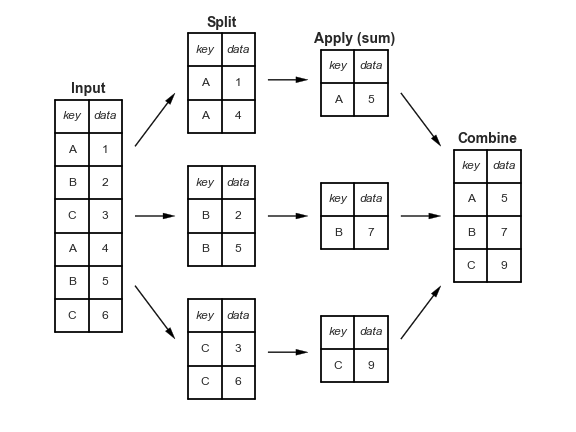

Esto deja en claro lo que `groupby` logra:

*  El paso de división implica dividir y agrupar un `DataFrame` según el valor de la clave especificada.
*  El paso de aplicación implica el cálculo de alguna función, generalmente un agregado, transformación o filtrado, dentro de los grupos individuales.
*  El paso de combinación fusiona los resultados de estas operaciones en una matriz de salida.

Como ejemplo concreto, echemos un vistazo al uso de Pandas para el cálculo que se muestra en este diagrama. Comenzaremos creando la entrada DataFrame:

In [ ]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

La operación más básica de dividir-aplicar-combinar se puede calcular con el método `groupby()` de DataFrames, pasando el nombre de la columna de clave deseada:

In [ ]:
df.groupby('key')

Observe que lo que se devuelve no es un conjunto de `DataFrames`, sino un objeto `DataFrameGroupBy`. Este objeto es donde está la magia: puede pensar en él como una vista especial de `DataFrame`, que está preparada para profundizar en los grupos, pero no realiza ningún cálculo real hasta que se aplica la agregación. Este enfoque de "evaluación perezosa" significa que los agregados comunes se pueden implementar de manera muy eficiente de una manera que es casi transparente para el usuario.

Para producir un resultado, podemos aplicar un agregado a este objeto `DataFrameGroupBy`, que realizará los pasos apropiados de aplicación/combinación para producir el resultado deseado:

In [ ]:
df.groupby('key').sum()

El método `sum()` es solo una posibilidad aquí; puede aplicar prácticamente cualquier función de agregación Pandas o NumPy común, así como prácticamente cualquier operación `DataFrame` válida.

### El objeto GroupBy 

El objeto `GroupBy` es una abstracción muy flexible. En muchos sentidos, simplemente puede tratarlo como si fuera una colección de mensajes `DataFrame` de correo electrónico, y hace las cosas difíciles bajo el capó. Veamos algunos ejemplos usando los datos de Planetas.

Quizás las operaciones más importantes que pone a disposición un `GroupBy` son agregar, filtrar, transformar y aplicar.

#### Indexación de columnas

El objeto `GroupBy` admite la indexación de columnas de la misma manera que `DataFrame`, y devuelve un objeto `GroupBy` modificado . Por ejemplo:

In [ ]:
planets.groupby('method')

In [ ]:
planets.groupby('method')['orbital_period']

Aquí hemos seleccionado un grupo `Series` en particular del grupo original `DataFrame` por referencia a su nombre de columna. Al igual que con el objeto `GroupBy`, no se realiza ningún cálculo hasta que llamamos a algún agregado en el objeto:

In [ ]:
planets.groupby('method')['orbital_period'].median()

Esto da una idea de la escala general de períodos orbitales (en días) a los que es sensible cada método.

#### Iteración sobre grupos 

El objeto GroupBy admite la iteración directa sobre los grupos, devolviendo cada grupo como un `Series` o `DataFrame`:

In [ ]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Esto puede ser útil para hacer ciertas cosas manualmente, aunque a menudo es mucho más rápido usar la funcionalidad `apply` incorporada.

#### Métodos de envío

A través de un poco de magia de clase Python, cualquier método no implementado explícitamente por el objeto `GroupBy` pasará y se llamará a los grupos, ya sean objetos `DataFrame` u objetos `Series`. Por ejemplo, puede usar el método `describe()` de DataFrames para realizar un conjunto de agregaciones que describan cada grupo en los datos:

In [ ]:
planets.groupby('method')['year'].describe().unstack()

Mirar esta tabla nos ayuda a comprender mejor los datos: por ejemplo, la gran mayoría de los planetas han sido descubiertos por los métodos de velocidad radial y tránsito, aunque este último solo se volvió común (debido a telescopios nuevos y más precisos) en la última década. Los métodos más nuevos parecen ser la variación del tiempo de tránsito y la modulación del brillo orbital, que no se utilizaron para descubrir un nuevo planeta hasta 2011.

Este es solo un ejemplo de la utilidad de los métodos de envío. Observe que se aplican a cada grupo individual y, a continuación, los resultados se combinan devuelven `GroupBy`. Nuevamente, cualquier método válido `DataFrame` se puede usar en el objeto `GroupBy` correspondiente, lo que permite algunas operaciones muy flexibles y poderosas.

### Agregar, filtrar, transformar, aplicar 

 En particular, los objetos `GroupBy` tienen métodos `aggregate()`, `filter()`, `transform()`, y `apply()` que implementan de manera eficiente una variedad de operaciones útiles antes de la combinación de los datos agrupados.

Para el propósito de las siguientes subsecciones, usaremos esto DataFrame:

In [ ]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

#### Aggregation

Ahora estamos familiarizados con las agregaciones `GroupBy` con `sum()`, `median()` y similares, pero el método `aggregate()` permite aún más flexibilidad. Puede tomar una cadena, una función o una lista de las mismas y calcular todos los agregados a la vez. Aquí hay un ejemplo rápido que combina todos estos:

In [ ]:
df.groupby('key').aggregate(['min', np.median, max])

Otro patrón útil es pasar un diccionario de nombres de columna de mapeo a operaciones que se aplicarán en esa columna:

In [ ]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

#### Filtering

Una operación de filtrado le permite eliminar datos según las propiedades del grupo. Por ejemplo, podríamos querer mantener todos los grupos en los que la desviación estándar es mayor que algún valor crítico:

In [ ]:
def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

La función de filtro debe devolver un valor booleano que especifique si el grupo pasa el filtrado. Aquí, debido a que el grupo A no tiene una desviación estándar mayor que 4, se elimina del resultado.

#### Transformation

Si bien la agregación debe devolver una versión reducida de los datos, la transformación puede devolver alguna versión transformada de los datos completos para recombinarlos. Para tal transformación, la salida tiene la misma forma que la entrada. Un ejemplo común es centrar los datos restando la media del grupo:

In [ ]:
df.groupby('key').transform(lambda x: x - x.mean())

#### El método apply()

El método `apply()` le permite aplicar una función arbitraria a los resultados del grupo. La función debe tomar una `DataFrame`, y volver ya sea un objeto pandas (por ejemplo, `DataFrame`, `Series`) o un escalar; la operación de combinación se adaptará al tipo de salida devuelta.

Por ejemplo, aquí hay un `apply()` que normaliza la primera columna por la suma de la segunda:

In [ ]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

`apply()` dentro de a `GroupBy` es bastante flexible: el único criterio es que la función tome a `DataFrame` y devuelva un objeto o escalar de Pandas.

### Especificando la clave de división

#### Una lista, matriz, serie o índice que proporciona las claves de agrupación

La clave puede ser cualquier serie o lista con una longitud que coincida con la del `DataFrame`. Por ejemplo:

In [ ]:
L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

Por supuesto, esto significa que hay otra forma más detallada de lograr lo `df.groupby('key')` de antes:

In [ ]:
display('df', "df.groupby(df['key']).sum()")

#### Un índice de mapeo de diccionario o serie al grupo

Otro método es proporcionar un diccionario que asigne valores de índice a las claves de grupo:

In [ ]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

#### Cualquier función de Python

De manera similar a la asignación, puede pasar cualquier función de Python que ingrese el valor del índice y genere el grupo:

In [ ]:
display('df2', 'df2.groupby(str.lower).mean()')

#### Una lista de claves válidas

Además, cualquiera de las opciones de clave anteriores se puede combinar para agrupar en un índice múltiple:

In [ ]:
df2.groupby([str.lower, mapping]).mean()

### Ejemplo de agrupación 

Como ejemplo de esto, en un par de líneas de código Python podemos juntar todo esto y contar los planetas descubiertos por método y por década:

In [ ]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

Esto muestra el poder de combinar muchas de las operaciones que hemos discutido hasta este punto cuando miramos conjuntos de datos realistas. Inmediatamente obtenemos una comprensión aproximada de cuándo y cómo se han descubierto los planetas en las últimas décadas.